plot time evolution of momentum distribution for different laser beam radii

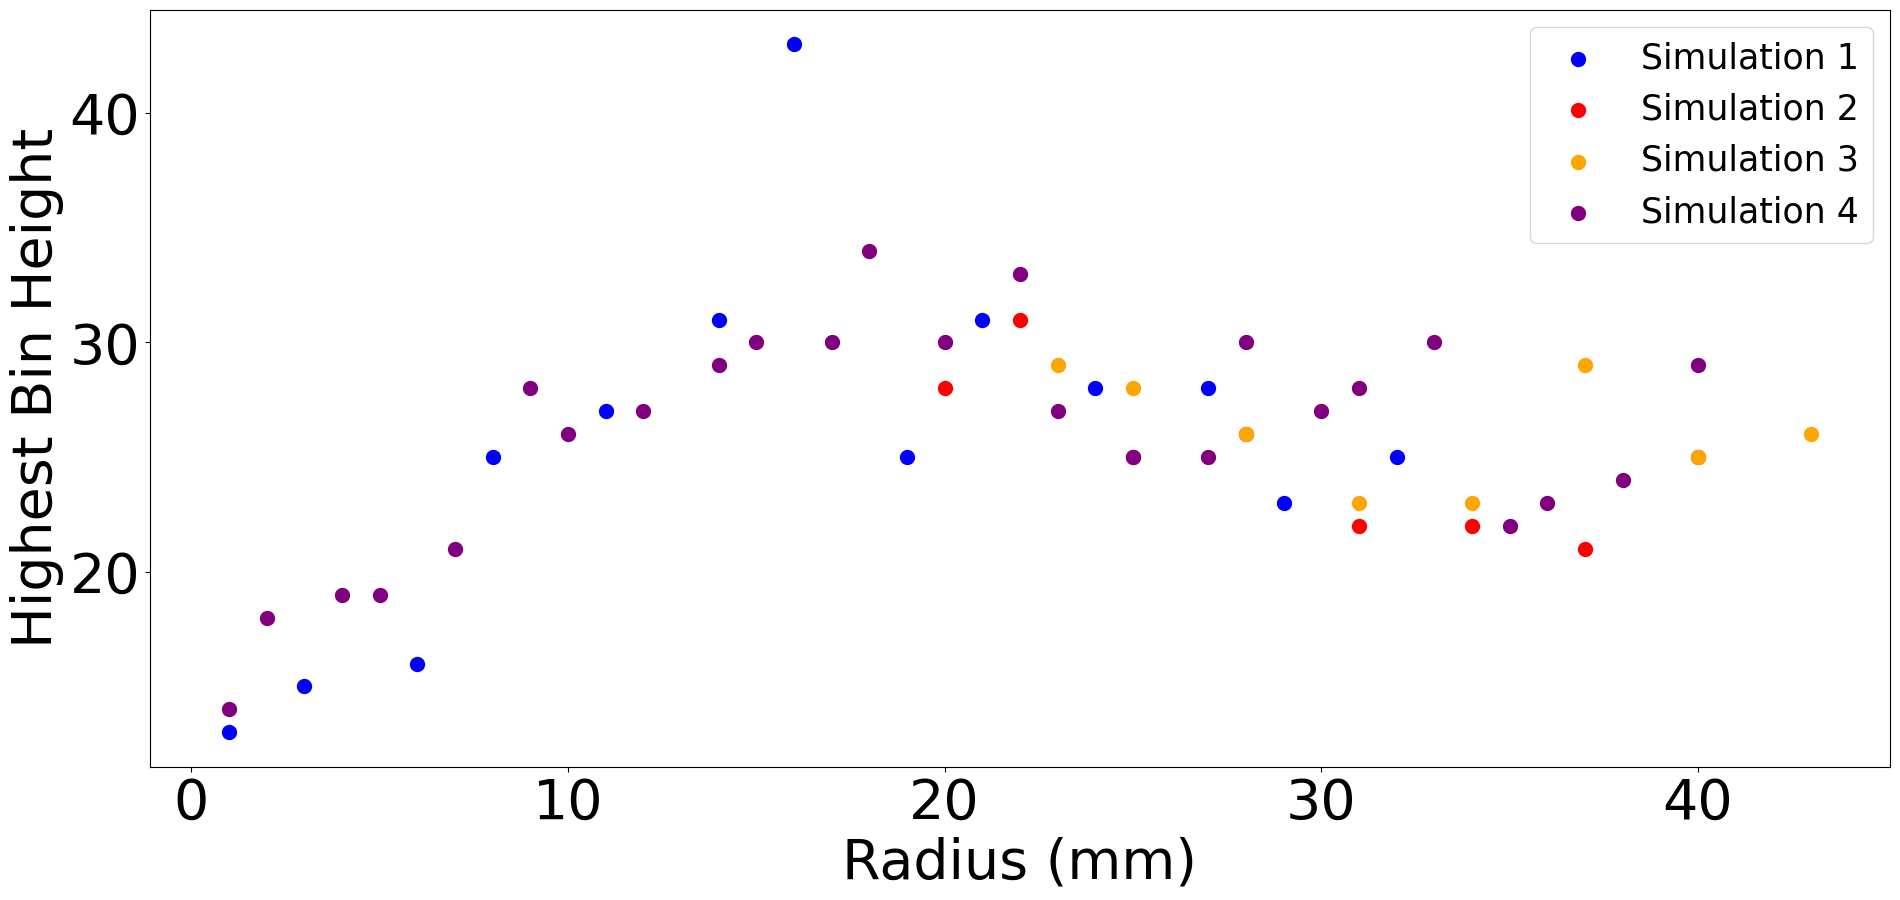

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


font_size = 40
legend_font_size = 25
figure_width = 20
figure_height = 10



colors=['blue','red','orange','purple']
plt.figure(figsize=(figure_width, figure_height))
plt.rcParams.update({'font.size': font_size})
for i in [1,2,3,4]:
    folder_path = f'results/radii{i}/'

    max_heights_final_turn = []
    radius_list = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            radius_list.append(filename)  # Assuming the filenames are like '1.0mm_data.npz'

            loaded_data = np.load(os.path.join(folder_path, filename))
            delta = loaded_data['delta']
            x = loaded_data['x'] * 1e3
            time = loaded_data['time']

            delta_first_turn = delta[0, :]
            delta_final_turn = delta[-1, :]

            bins = np.linspace(0e-4, 1e-4, 100)

            counts_first_turn, _ = np.histogram(delta_first_turn, bins=bins)
            counts_final_turn, _ = np.histogram(delta_final_turn, bins=bins)

            max_height_first_turn = np.max(counts_first_turn)
            max_height_final_turn = np.max(counts_final_turn)

            max_heights_final_turn.append(max_height_final_turn)

    # Convert radius list to float
    radius_list_float = [float(radius[:-4]) for radius in radius_list]
    # for radius in radius_list:
    #     print(radius[:-4])
    
    # Plotting the results
    plt.scatter(radius_list_float, max_heights_final_turn, label=f'Simulation {i}', linewidth=5, color=colors[i-1])


plt.xlabel('Radius (mm)')
plt.ylabel('Highest Bin Height')
plt.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig('Cooling_rate_vs_laser_radius.png', format='png', dpi=300)
plt.show()
